# Import libraries

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter



# Load the dataset and some manipulations

In [136]:
dataframe = pd.read_csv("Movies.csv")

df= dataframe.copy()

df = df.dropna()

df.index = range(1, len(df) + 1)

df['year'] = pd.to_numeric(df['year'], errors='coerce')

df = df[df['year'].notnull()]

df['year'] = df['year'].astype(int)

df = df.drop(columns=['movie_id', 'overview', 'director', 'cast', 'sr_no'])

df = df[~df['year'].isin([2025, 2026])]

df_sorted = df.sort_values(by='year', ascending=False)

df_sorted.index = range(1, len(df_sorted) + 1)



# Top 5 actors

In [137]:
dataframe = dataframe.dropna(subset=['cast'])
dataframe['cast_list'] = dataframe['cast'].str.split(', ')
dataframe_exploded = dataframe.explode('cast_list')

actor_counts = dataframe_exploded['cast_list'].value_counts()

top_5_actors = actor_counts.head()
top_5_df = top_5_actors.reset_index()
top_5_df.columns = ['Cast', 'No of Movies']

top_5_df.index = range(1, len(top_5_df) + 1)
print("Top 5 actors")
display(top_5_df)

Top 5 actors


,Cast,No of Movies
1,Amitabh Bachchan,115
2,Akshay Kumar,109
3,Salman Khan,75
4,Sanjay Dutt,73
5,Ajay Devgn,68


# Top 5 directors

In [138]:
dataframe = dataframe.dropna(subset=['director'])
dataframe['director_list'] = dataframe['director'].str.split(', ')
dataframe_exploded = dataframe.explode('director_list')

director_counts = dataframe_exploded['director_list'].value_counts()

top_5_directors = director_counts.head()

top_directors_df = top_5_directors.reset_index()
top_directors_df.columns = ['Director', 'No of Movies']

top_directors_df.index = range(1, len(top_directors_df) + 1)
print("Top 5 directors")
display(top_directors_df)


Top 5 directors


,Director,No of Movies
1,David Dhawan,29
2,Priyadarshan,22
3,Ram Gopal Varma,22
4,Anurag Kashyap,21
5,Rohit Shetty,18


# Top 5 Actor Pairs

In [139]:
df_clean = dataframe.dropna(subset=['cast'])
df_clean['cast_list'] = df_clean['cast'].str.split(', ')

co_actor_counter = Counter()

for actors in df_clean['cast_list']:
    if len(actors) > 1:
        for pair in combinations(sorted(actors), 2):
            co_actor_counter[pair] += 1

top_5_pairs = co_actor_counter.most_common(5)

print("Top 5 Actor Pairs (Most Frequent Co-Appearances):\n")
for pair, count in top_5_pairs:
    print(f"{pair[0]} & {pair[1]} - {count} movies together")


Top 5 Actor Pairs (Most Frequent Co-Appearances):

Akshay Kumar & Paresh Rawal - 11 movies together
Akshay Kumar & Suniel Shetty - 10 movies together
Akshay Kumar & Kareena Kapoor - 9 movies together
Abhishek Bachchan & Amitabh Bachchan - 8 movies together
Ajay Devgn & Tabu - 8 movies together


# Top 5 Director-Actor Collaborations

In [145]:
df_clean = dataframe.dropna(subset=['cast', 'director'])
df_clean['cast_list'] = df_clean['cast'].str.split(', ')
df_clean['director_list'] = df_clean['director'].str.split(', ')

director_actor_counter = Counter()

for _, row in df_clean.iterrows():
    directors = row['director_list']
    actors = row['cast_list']
    for director in directors:
        for actor in actors:
            director_actor_counter[(director, actor)] += 1

top_5_collab = director_actor_counter.most_common(5)

print("Top 5 Director-Actor Collaborations:\n")
for (director, actor), count in top_5_collab:
    print(f"{director} & {actor} - {count} movies together")


Top 5 Director-Actor Collaborations:

David Dhawan & Govinda - 13 movies together
Rohit Shetty & Ajay Devgn - 12 movies together
Priyadarshan & Paresh Rawal - 10 movies together
David Dhawan & Karisma Kapoor - 9 movies together
David Dhawan & Salman Khan - 8 movies together


# Genre Distribution

In [141]:
df_genres = df_sorted.copy()
df_genres['genre'] = df_genres['genre'].str.split(', ')
df_genres = df_genres.explode('genre')

genre_counts = df_genres['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

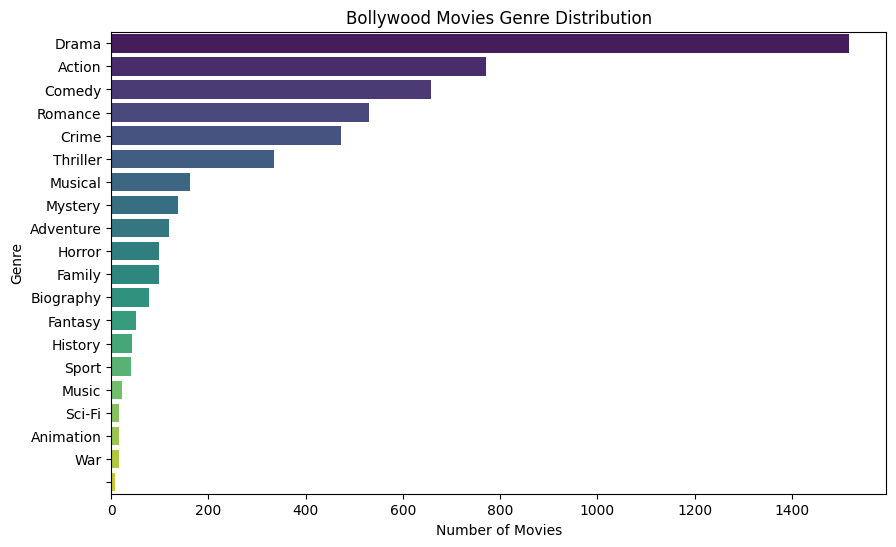

In [142]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=genre_counts,
    x='count',
    y='genre',
    hue='genre',       
    palette='viridis',
    legend=False       
)
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.title('Bollywood Movies Genre Distribution')
plt.show()

# Movies Released per Decade

In [143]:
max_year = df_sorted['year'].max()

df_sorted['decade_start'] = (df_sorted['year'] // 10) * 10
df_sorted['decade_end'] = df_sorted['decade_start'] + 9

df_sorted.loc[df_sorted['decade_end'] > max_year, 'decade_end'] = max_year

df_sorted['decade_label'] = df_sorted['decade_start'].astype(str) + '–' + df_sorted['decade_end'].astype(str)

movies_per_decade = df_sorted['decade_label'].value_counts().sort_index()

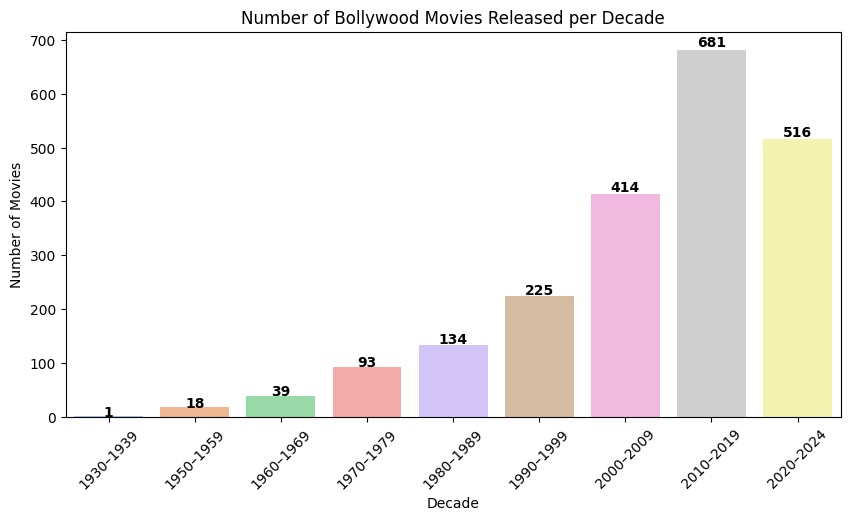

In [144]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x=movies_per_decade.index,
    y=movies_per_decade.values,
    hue=movies_per_decade.index,
    palette='pastel',
    legend=False
)
plt.title('Number of Bollywood Movies Released per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)

for i, v in enumerate(movies_per_decade.values):
    plt.text(i, v*1.01, str(v), ha='center', fontweight='bold')

plt.show()